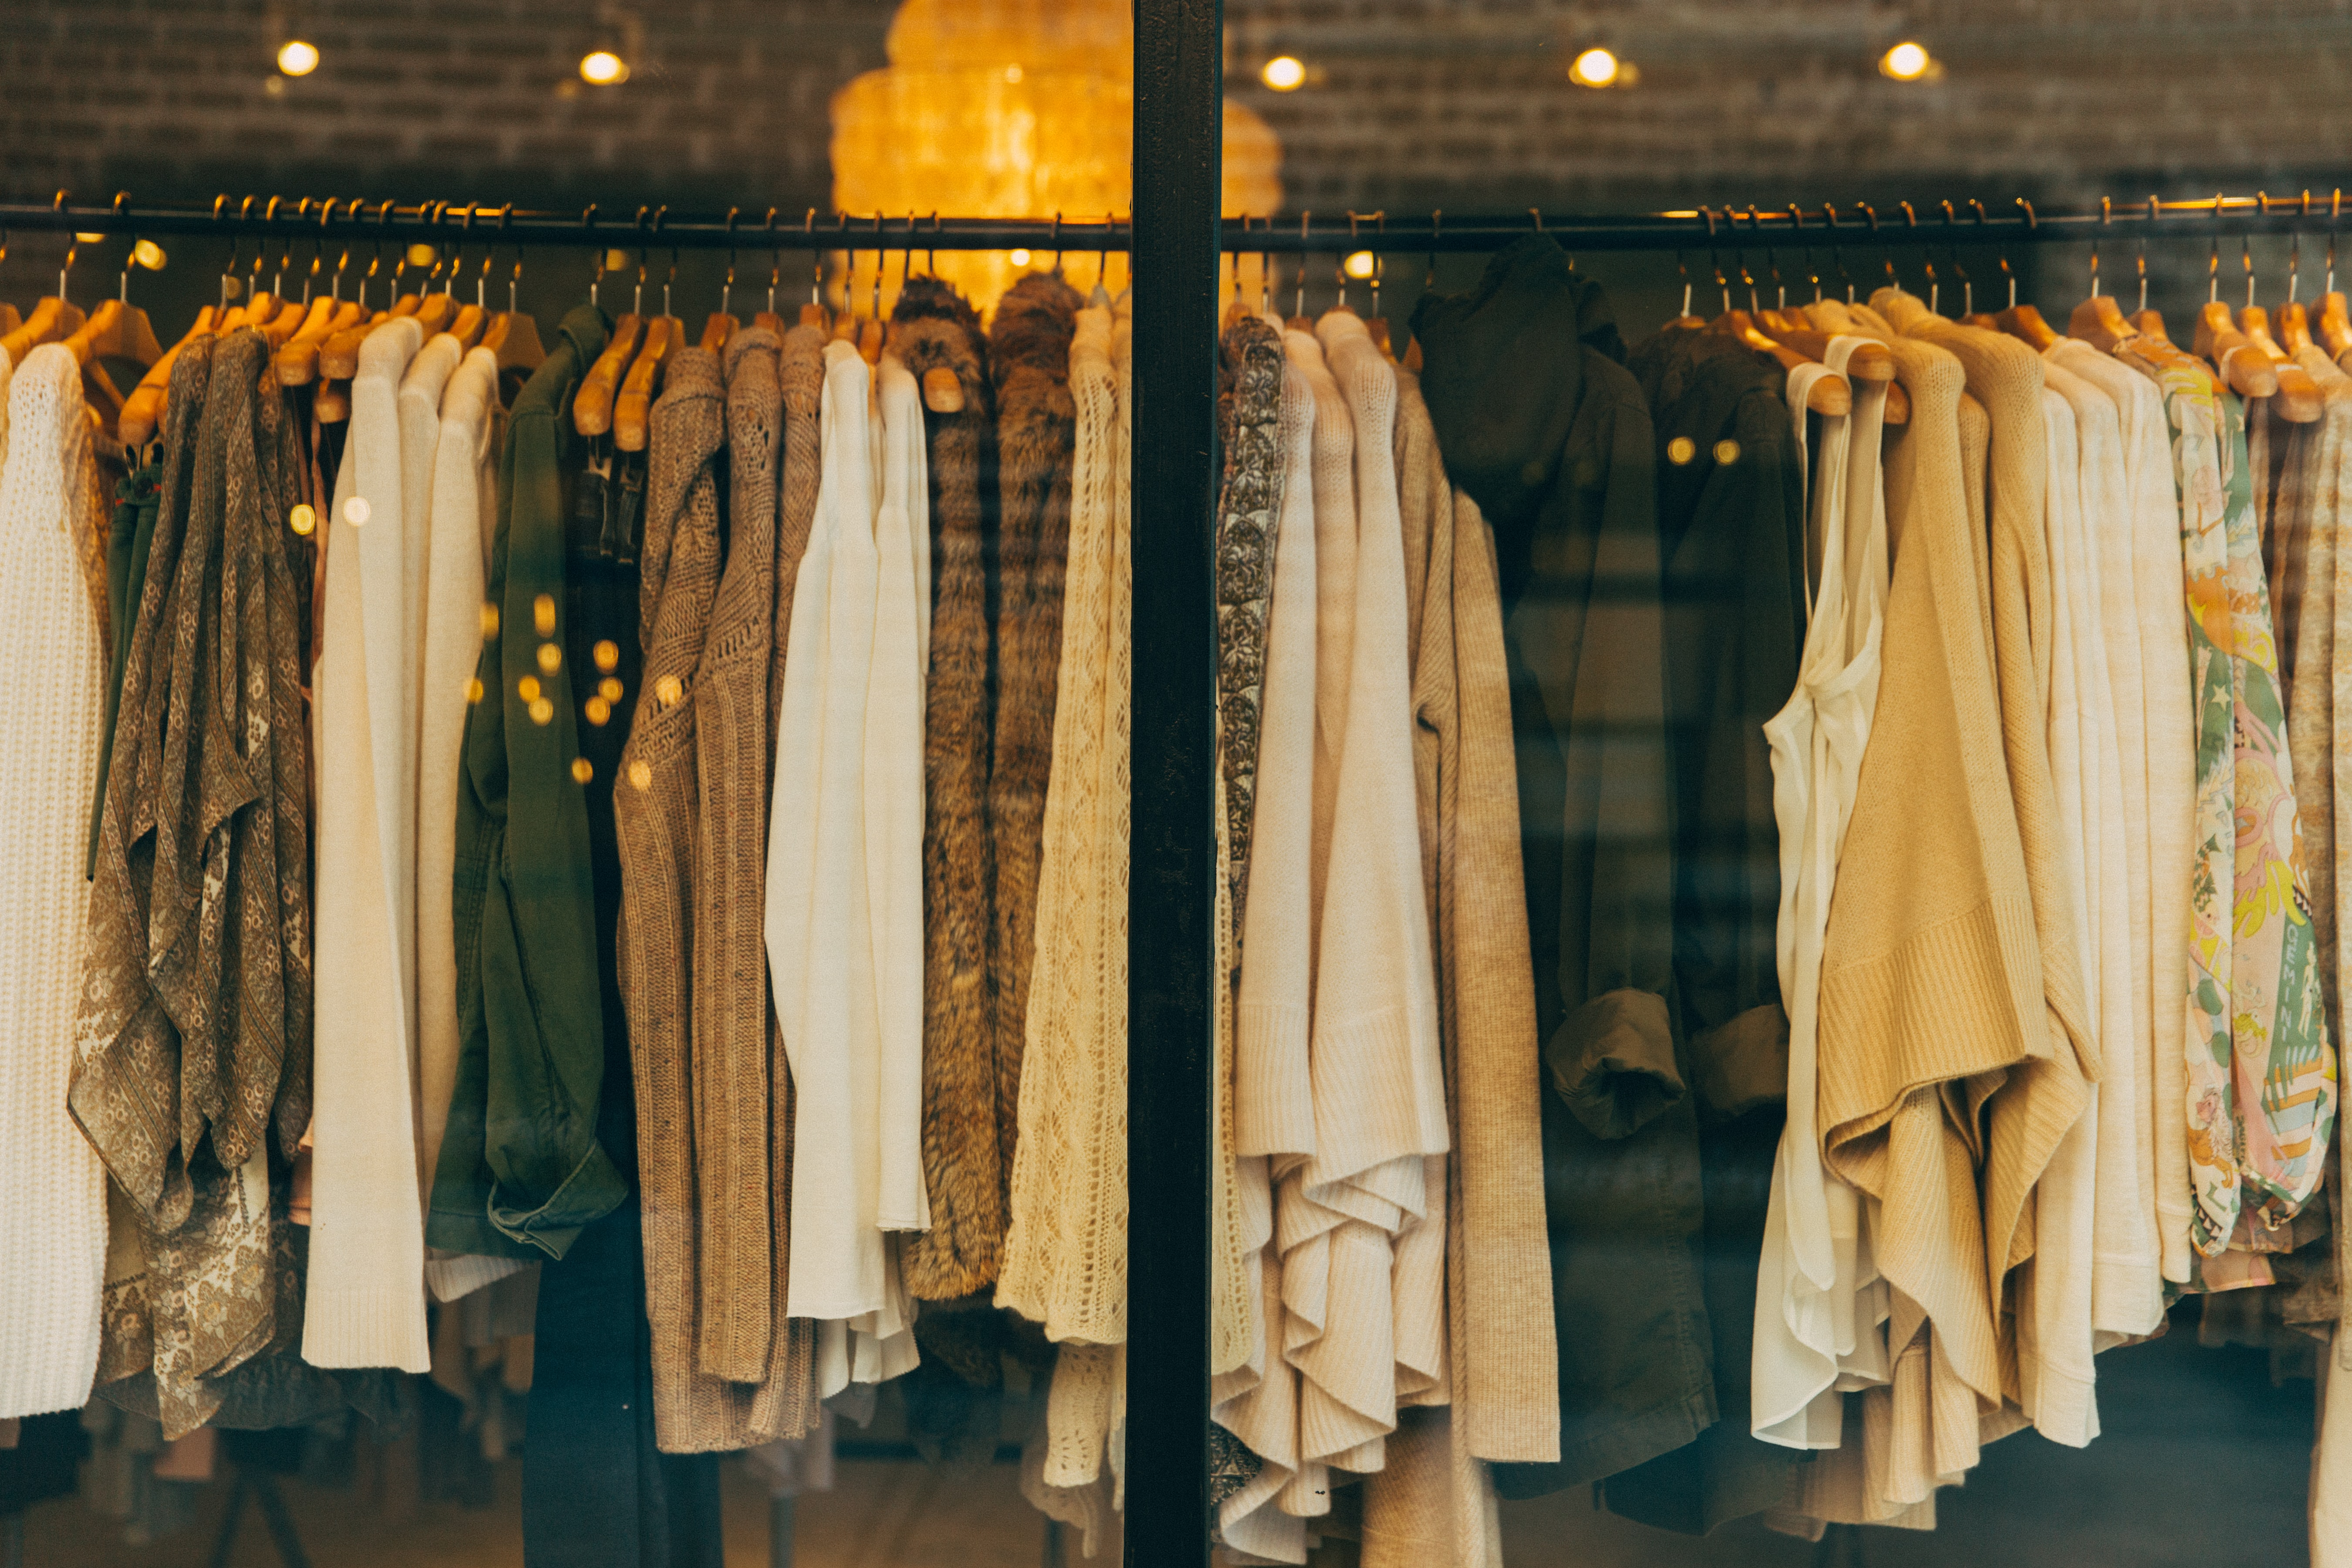
Photo by <a href="https://unsplash.com/@hannahmorgan7?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Hannah Morgan</a> on <a href="https://unsplash.com/s/photos/womens-clothing-and-technologoy?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

Dataset used: https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. License: CC0: Public Domain (https://creativecommons.org/publicdomain/zero/1.0/) 

Very useful notebook: https://www.kaggle.com/devanshiipatel/eda-and-sentiment-analysis

Navigate to https://cloud.ibm.com/login and Create an account

https://www.ibm.com/uk-en/cloud/watson-studio

https://cloud.ibm.com/services/tone-analyzer/crn%3Av1%3Abluemix%3Apublic%3Atone-analyzer%3Aeu-gb%3Aa%2F733401518c6645fcb653523a33793982%3A03def70a-f934-430e-b391-945bb1de9f4e%3A%3A?paneId=gettingStarted&new=true

"url": "https://api.eu-gb.tone-analyzer.watson.cloud.ibm.com/instances/03def70a-f934-430e-b391-945bb1de9f4e"

"apikey": "_U5bMvvleE1akax5ayhRXJS7lksyyhv4TWQewF0Le6f5"

Tasks:
1) Create a free IBM Watson account
2) Take a note of your url and api key

1) Load the data
2) Clean the data
3) Sample 500 records at random
4) Perform the sentiment analysis using IBM Watson

1) Load the data
2) Show word cloud, sentiment and other data


The first thing we need to do is to load some suitable data. I have selected a Kaggle dataset containing womens e-commerce clothing reviews that can be found here - https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.

The dataset is provided under the "CC0: Public Domain" license which means it has is available in the public domain and can be copied, modified or distributed including for commercial purposes (see https://creativecommons.org/publicdomain/zero/1.0/).

In [1]:
import pandas as pd
from imblearn.pipeline import Pipeline

import sys
sys.path.insert(1, r'C:\Users\GHarrison\OneDrive - Lincoln College\Python Projects\Data Science\Utilities')

from language_tools import TextContractions, TextStatistics, TextWordCloud

In [2]:
df_reviews = pd.read_csv("data/Womens Clothing E-Commerce Reviews.csv")
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


We are not too bothered about detailed exploratory data analysis or data cleaning for the purposes of this tutorial but we are going to carry out a bit of clean-up and then sample a sub-set of rows for reasons that will become apparent later on ...

In [3]:
df_reviews = df_reviews.iloc[:,1:] # Drop the first column which is an un-named internal index
df_reviews.drop_duplicates(inplace=True) # There are 21 duplicate rows in the data that will be dropped
df_reviews.dropna(inplace=True) # There are 3803 records remaining with nulls in the data; those rows will be removed
df_reviews = df_reviews.sample(n=500, random_state=42).reset_index(drop=True) # Finally sample 500 rows from the clean data and use a random_state for repeatability
df_reviews.info() # Now take a look at the info for the clean and sampled data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Title                    500 non-null    object
 3   Review Text              500 non-null    object
 4   Rating                   500 non-null    int64 
 5   Recommended IND          500 non-null    int64 
 6   Positive Feedback Count  500 non-null    int64 
 7   Division Name            500 non-null    object
 8   Department Name          500 non-null    object
 9   Class Name               500 non-null    object
dtypes: int64(5), object(5)
memory usage: 39.2+ KB


https://towardsdatascience.com/my-absolute-go-to-for-sentiment-analysis-textblob-3ac3a11d524

Now we will apply some feature engineering to enable additional insights to be derived from our data ...

In [4]:
#df_reviews['Review Text'] = df_reviews['Review Text'].str.replace("I am", "I'm")
#df_reviews.drop('Review Text', axis=1, inplace=True)
df_reviews.head()

Clothing ID  Age              Title  \
0          850   64  A really cute top   
1          829   30        Great shirt   
2         1008   33        Great skirt   
3          872   37         Lovely top   
4          862   59   Runs quite large   

                                         Review Text  Rating  Recommended IND  \
0  I am normally an xs or s in tanks, so ordered ...       4                1   
1  I ordered this shirt last week, and i wore it ...       5                1   
2  Love the material -- it is a thick cotton, but...       5                1   
3  This is a beautiful, simple, yet feminine top....       5                1   
4  The photo of the mila turtleneck where model h...       2                0   

   Positive Feedback Count   Division Name Department Name Class Name  
0                       31  General Petite            Tops    Blouses  
1                        0         General            Tops    Blouses  
2                        4         General         Bottoms     Skirts  
3                        0         General            Tops      Knits  
4                        3         General            Tops      Knits

In [5]:
SAVE_X = False

In [6]:
statistics = TextStatistics(source_column='Review Text', save_x=SAVE_X)
contractions = TextContractions(source_column='Review Text', target_column='Transformed Review Text', save_x=SAVE_X)
wordcloud = TextWordCloud(source_column='Transformed Review Text', additional_stopwords=['it'], save_x=SAVE_X)

ic| "TextStatisticsEngineering.init": 'TextStatisticsEngineering.init'
    source_column: 'Review Text'
    save_x: False
ic| "TextContractionsExpander.init": 'TextContractionsExpander.init'
    source_column: 'Review Text'
    target_column: 'Transformed Review Text'
    contractions_dict: None
    save_x: False
ic| "TextWordCloudText.init": 'TextWordCloudText.init'
    source_column: 'Transformed Review Text'
    save_x: False


In [7]:
text_model = Pipeline([
                      ('statistics', statistics),
                      ('contractions', contractions), 
                      ('wordcloud', wordcloud) 
                      ])

In [47]:
from urllib.request import urlopen

DEFAULT_CONTRACTIONS_URL = "https://github.com/grahamharrison68/Public-Github/blob/master/Analyzing%20Customer%20Feedback/contractions.json?raw=true"
contractions_dict = json.load(urlopen(DEFAULT_CONTRACTIONS_URL))
contractions_dict

{"ain't": 'am not / are not / is not / has not / have not',
 "aren't": 'are not',
 "can't": 'cannot',
 "can't've": 'cannot have',
 "'cause": 'because',
 "could've": 'could have',
 "couldn't": 'could not',
 "couldn't've": 'could not have',
 "didn't": 'did not',
 "doesn't": 'does not',
 "don't": 'do not',
 "hadn't": 'had not',
 "hadn't've": 'had not have',
 "hasn't": 'has not',
 "haven't": 'have not',
 "he'd": 'he had',
 "he'd've": 'he would have',
 "he'll": 'he will',
 "he'll've": 'he shall have / he will have',
 "he's": 'he is',
 "how'd": 'how did',
 "how'd'y": 'how do you',
 "how'll": 'how will',
 "how's": 'how is',
 "I'd": 'I would',
 "I'd've": 'I would have',
 "I'll": 'I will',
 "I'll've": 'I shall have / I will have',
 "I'm": 'I am',
 "I've": 'I have',
 "i'd": 'I would',
 "i'd've": 'I would have',
 "i'll": 'I will',
 "i'll've": 'I will have',
 "i'm": 'I am',
 "i've": 'I have',
 "isn't": 'is not',
 "it'd": 'it had / it would',
 "it'd've": 'it would have',
 "it'll": 'it shall / it wi

In [83]:
import re
l = {"NORT'H":"N",'SOUTH':'S','EAST':'E','WEST':'W', "AIN'T": "are not", "HOW'S": "how is"}
#pattern = '|'.join(sorted(re.escape(k) for k in l))
#pattern = r'\b({})\b'.format('|'.join(sorted(re.escape(k) for k in l)))
pattern = '(%s)' % '|'.join(l.keys())

address = "123 nort'h ain't how's anywhere southstreet"
test = re.sub(pattern, lambda m: l.get(m.group(0).upper()), address, flags=re.IGNORECASE)
test

'123 N are not how is anywhere Sstreet'

In [74]:
pattern

"(NORTH|SOUTH|EAST|WEST|ain't)"

In [79]:
contractions_dict_upper =  {k.upper(): v for k, v in contractions_dict.items()}
contractions_dict_upper

{"AIN'T": 'am not / are not / is not / has not / have not',
 "AREN'T": 'are not',
 "CAN'T": 'cannot',
 "CAN'T'VE": 'cannot have',
 "'CAUSE": 'because',
 "COULD'VE": 'could have',
 "COULDN'T": 'could not',
 "COULDN'T'VE": 'could not have',
 "DIDN'T": 'did not',
 "DOESN'T": 'does not',
 "DON'T": 'do not',
 "HADN'T": 'had not',
 "HADN'T'VE": 'had not have',
 "HASN'T": 'has not',
 "HAVEN'T": 'have not',
 "HE'D": 'he had',
 "HE'D'VE": 'he would have',
 "HE'LL": 'he will',
 "HE'LL'VE": 'he shall have / he will have',
 "HE'S": 'he is',
 "HOW'D": 'how did',
 "HOW'D'Y": 'how do you',
 "HOW'LL": 'how will',
 "HOW'S": 'how is',
 "I'D": 'I would',
 "I'D'VE": 'I would have',
 "I'LL": 'I will',
 "I'LL'VE": 'I will have',
 "I'M": 'I am',
 "I'VE": 'I have',
 "ISN'T": 'is not',
 "IT'D": 'it had / it would',
 "IT'D'VE": 'it would have',
 "IT'LL": 'it shall / it will',
 "IT'LL'VE": 'it shall have / it will have',
 "IT'S": 'it is',
 "LET'S": 'let us',
 "MA'AM": 'madam',
 "MAYN'T": 'may not',
 "MIGHT'VE": 

In [89]:
# https://stackoverflow.com/questions/14156473/can-you-write-a-str-replace-using-dictionary-values-in-python
#contractions_pattern = pattern = r'\b({})\b'.format('|'.join(sorted(re.escape(k) for k in contractions_dict)))
#contractions_pattern = '|'.join(sorted(re.escape(k) for k in contractions_dict_upper))
contractions_dict_upper =  {k.upper(): v for k, v in contractions_dict.items()}
pattern = '|'.join(contractions_dict_upper.keys())

test_text = "how's your day been today? My day might've gone better but i'm testing contractions.json and I'm struggling"
test_text_out = re.sub(pattern, lambda m: contractions_dict_upper.get(m.group(0).upper()), test_text, flags=re.IGNORECASE)
test_text_out

'how is your day been today? My day might have gone better but I am testing contractions.json and I am struggling'

In [61]:
contractions_pattern

"\\b('cause|I'd|I'd've|I'll|I'll've|I'm|I've|You've|ain't|aren't|can't|can't've|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|i'd|i'd've|i'll|i'll've|i'm|i've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|sha'n't|shan't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so's|so've|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've)\\b"

In [54]:
'%s is smaller than %s' % ('one', 'two')

'one is smaller than two'

In [49]:
x = '(%s)' % '|'.join(contractions_dict.keys())
x

"(ain't|aren't|can't|can't've|'cause|could've|couldn't|couldn't've|didn't|doesn't|don't|hadn't|hadn't've|hasn't|haven't|he'd|he'd've|he'll|he'll've|he's|how'd|how'd'y|how'll|how's|I'd|I'd've|I'll|I'll've|I'm|I've|i'd|i'd've|i'll|i'll've|i'm|i've|isn't|it'd|it'd've|it'll|it'll've|it's|let's|ma'am|mayn't|might've|mightn't|mightn't've|must've|mustn't|mustn't've|needn't|needn't've|o'clock|oughtn't|oughtn't've|shan't|sha'n't|shan't've|she'd|she'd've|she'll|she'll've|she's|should've|shouldn't|shouldn't've|so've|so's|that'd|that'd've|that's|there'd|there'd've|there's|they'd|they'd've|they'll|they'll've|they're|they've|to've|wasn't|we'd|we'd've|we'll|we'll've|we're|we've|weren't|what'll|what'll've|what're|what's|what've|when's|when've|where'd|where's|where've|who'll|who'll've|who's|who've|why's|why've|will've|won't|won't've|would've|wouldn't|wouldn't've|y'all|y'all'd|y'all'd've|y'all're|y'all've|you'd|you'd've|you'll|you'll've|you're|you've|You've)"

In [8]:
df_reviews_transformed = text_model.fit_transform(df_reviews)
df_reviews_transformed.head()

ic| 'TextStatisticsEngineering.fit'
ic| 'TextStatisticsEngineering.transform'
ic| 'TextContractionsExpander.fit'
ic| 'TextContractionsExpander.transform'
ic| 'TextWordCloudText.fit'
ic| 'TextWordCloudText.transform'


Clothing ID  Age              Title  \
0          850   64  A really cute top   
1          829   30        Great shirt   
2         1008   33        Great skirt   
3          872   37         Lovely top   
4          862   59   Runs quite large   

                                         Review Text  Rating  Recommended IND  \
0  I am normally an xs or s in tanks, so ordered ...       4                1   
1  I ordered this shirt last week, and i wore it ...       5                1   
2  Love the material -- it is a thick cotton, but...       5                1   
3  This is a beautiful, simple, yet feminine top....       5                1   
4  The photo of the mila turtleneck where model h...       2                0   

   Positive Feedback Count   Division Name Department Name Class Name  \
0                       31  General Petite            Tops    Blouses   
1                        0         General            Tops    Blouses   
2                        4         General         Bottoms     Skirts   
3                        0         General            Tops      Knits   
4                        3         General            Tops      Knits   

   Review Text_polarity  Review Text_subjectivity Review Text_sentiment  \
0              0.191005                  0.468519              Positive   
1              0.232292                  0.621726              Positive   
2             -0.119444                  0.525694              Negative   
3              0.069133                  0.491837              Positive   
4             -0.166667                  0.450000              Negative   

   Review Text_length  Review Text_word_count  \
0                 499                     107   
1                 319                      61   
2                 500                      98   
3                 235                      51   
4                 430                      82   

                             Transformed Review Text  \
0  I am normally an xs or s in tanks, so ordered ...   
1  I ordered this shirt last week, and i wore it ...   
2  Love the material -- it is a thick cotton, but...   
3  This is a beautiful, simple, yet feminine top....   
4  The photo of the mila turtleneck where model h...   

                   Transformed Review Text_wordcloud  
0  normally xs tanks ordered size looks pretty mu...  
1  ordered shirt last week wore soon arrived beau...  
2  love material thick cotton structured enough t...  
3  beautiful simple yet feminine top little tight...  
4  photo mila turtleneck model hands sides hair b...

In [9]:
df_reviews_transformed['Review Text_sentiment'].value_counts()

Positive    432
Neutral      40
Negative     28
Name: Review Text_sentiment, dtype: int64

In [10]:
df_reviews_transformed.describe().T

count        mean         std        min  \
Clothing ID               500.0  929.362000  178.372915  90.000000   
Age                       500.0   42.638000   12.478396  18.000000   
Rating                    500.0    4.246000    1.124283   1.000000   
Recommended IND           500.0    0.838000    0.368820   0.000000   
Positive Feedback Count   500.0    2.390000    4.837841   0.000000   
Review Text_polarity      500.0    0.231921    0.183711  -0.358333   
Review Text_subjectivity  500.0    0.561587    0.123717   0.000000   
Review Text_length        500.0  311.260000  138.871938  47.000000   
Review Text_word_count    500.0   60.766000   27.355729  10.000000   

                                 25%         50%          75%     max  
Clothing ID               860.000000  940.000000  1077.000000  1195.0  
Age                        33.750000   40.000000    51.000000    78.0  
Rating                      4.000000    5.000000     5.000000     5.0  
Recommended IND             1.000000    1.000000     1.000000     1.0  
Positive Feedback Count     0.000000    1.000000     3.000000    43.0  
Review Text_polarity        0.128095    0.233521     0.333333     0.9  
Review Text_subjectivity    0.481898    0.550000     0.620432     1.0  
Review Text_length        194.000000  316.000000   441.500000   504.0  
Review Text_word_count     37.000000   61.000000    85.000000   108.0

Now just apply the word cloud do the dataframe for every row, then get the top n words for the new columns

In [11]:
df_reviews_transformed.to_csv("test.csv", index_label="index")

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from more_itertools import locate

In [14]:
def get_top_n_words_original(x, n=10, i=1):
    vec = CountVectorizer(ngram_range=(i,i)).fit(x)
    bow = vec.transform(x)
    sum_words = bow.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x:x[1], reverse=True)
    #return words_freq[:n]
    return pd.DataFrame(words_freq[:n], columns=['ngram', 'count'])

In [14]:
def get_top_n_words_old(x : pd.Series, n : int = 15, i : int = 3) -> pd.DataFrame:

    vectorizer = CountVectorizer(ngram_range=(i,i)).fit(x)
    doc_term_matrix = vectorizer.transform(x)

    sum_words = doc_term_matrix.sum(axis=0)
    words_freq = [(idx, word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]

    df_top_n_words = pd.DataFrame(words_freq, columns=['ngram_idx', 'ngram', 'count']).sort_values(by=['count'], ascending=False).reset_index(drop=True).iloc[0:n]

    df_ngram_detail = pd.DataFrame(columns=['ngram_idx', 'index'])
    for idx, row in df_top_n_words.iterrows():
        row_list = list(locate(list(doc_term_matrix.toarray().T[row['ngram_idx']])))
        df_new_rows = pd.DataFrame([row['ngram_idx']] * len(row_list), row_list, columns=['ngram_idx']).reset_index().iloc[:,[1,0]]  
        df_ngram_detail = pd.concat([df_ngram_detail, df_new_rows])    
    
    return df_top_n_words, df_ngram_detail

In [17]:
def get_top_n_words(x : pd.Series, n : int = 15, i : int = 3) -> pd.DataFrame:

    count_vectorizer = CountVectorizer(ngram_range=(i,i)).fit(x)
    doc_term_matrix = count_vectorizer.transform(x)

    sum_words = doc_term_matrix.sum(axis=0)
    words_freq = [(idx, word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]

    df_top_ngrams = pd.DataFrame(words_freq, columns=['ngram_idx', 'ngram', 'count']).sort_values(by=['count'], ascending=False).reset_index(drop=True).iloc[0:n]

    df_ngram_details = pd.DataFrame(columns=['ngram_idx', 'index'])
    for _ , row in df_top_ngrams.iterrows():
        row_list = list(locate(list(doc_term_matrix.toarray().T[row['ngram_idx']])))
        df_new_rows = pd.DataFrame([row['ngram_idx']] * len(row_list), row_list, columns=['ngram_idx']).reset_index().iloc[:,[1,0]]  
        df_ngram_details = pd.concat([df_ngram_details, df_new_rows])    

In [15]:
df_top_n_words, df_ngram_detail = get_top_n_words(df_reviews_transformed['Transformed Review Text_wordcloud'], n=15, i=3)
df_top_n_words

ngram_idx                       ngram  count
0        1361            cannot wait wear     12
1        8515   received many compliments      5
2        8918              runs true size      5
3        3702              fits true size      5
4        6204              love love love      4
5        3670             fits like glove      3
6        9600          size fit perfectly      3
7       12670            worth full price      3
8        7020           nice thick fabric      3
9        8496          really wanted love      3
10       9599            size fit perfect      3
11      12691  would definitely recommend      3
12       6177            love first sight      3
13       8522    received ton compliments      3
14       1110            bought size fits      3

In [16]:
df_ngram_detail

ngram_idx index
0       1361     8
1       1361    17
2       1361    25
3       1361    43
4       1361   141
..       ...   ...
1       8522   393
2       8522   398
0       1110    39
1       1110    64
2       1110   457

[61 rows x 2 columns]

In [18]:
i = 3
n = 15
x = df_reviews_transformed['Transformed Review Text_wordcloud']

#vectorizer = CountVectorizer(ngram_range=(i,i)).fit(x)
#doc_term_matrix = vectorizer.transform(x)
#sum_words = doc_term_matrix.sum(axis=0)
#words_freq = [(idx, word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
#words_freq = sorted(words_freq, key=lambda x:x[2], reverse=True)
#return words_freq[:n]
#df_test =  pd.DataFrame(words_freq, columns=['ngram_idx', 'ngram', 'count']).sort_values(by=['count'], ascending=False).reset_index().iloc[0:n]

count_vectorizer = CountVectorizer(ngram_range=(i,i)).fit(x)
doc_term_matrix = count_vectorizer.transform(x)

sum_words = doc_term_matrix.sum(axis=0)
words_freq = [(idx, word, sum_words[0, idx]) for word, idx in count_vectorizer.vocabulary_.items()]

df_top_ngrams = pd.DataFrame(words_freq, columns=['ngram_idx', 'ngram', 'count']).sort_values(by=['count'], ascending=False).reset_index(drop=True).iloc[0:n]

df_ngram_details = pd.DataFrame(columns=['ngram_idx', 'index'])
for _ , row in df_top_ngrams.iterrows():
    row_list = list(locate(list(doc_term_matrix.toarray().T[row['ngram_idx']])))
    df_new_rows = pd.DataFrame([row['ngram_idx']] * len(row_list), row_list, columns=['ngram_idx']).reset_index().iloc[:,[1,0]]  
    df_ngram_details = pd.concat([df_ngram_details, df_new_rows])    
        

In [30]:
df_test

index  ngram_idx                      ngram  count
0     212       1362           cannot wait wear     12
1    3135       8957             runs true size      5
2    3044       8554  received many compliments      5
3    8220       3704             fits true size      5
4    2015       6243             love love love      4
5    4790      12711           worth full price      3
6    4756      11988          wanted love dress      3
7     586       8535         really wanted love      3
8    4607       3672            fits like glove      3
9    5850       7059          nice thick fabric      3
10   1099       1110           bought size fits      3
11   4697       8561   received ton compliments      3
12   3253       9640         size fit perfectly      3
13   3882       9639           size fit perfect      3
14    935       6216           love first sight      3

In [32]:
from more_itertools import locate

In [50]:
df_ngram_detail = pd.DataFrame(columns=['ngram_idx', 'index'])
for idx, row in df_test.iterrows():
    row_list = list(locate(list(doc_term_matrix.toarray().T[row['ngram_idx']])))
    df_new_rows = pd.DataFrame([row['ngram_idx']] * len(row_list), row_list, columns=['ngram_idx']).reset_index().iloc[:,[1,0]]  
    df_ngram_detail = pd.concat([df_ngram_detail, df_new_rows])

In [53]:
df_ngram_detail

ngram_idx index
0       1362     8
1       1362    17
2       1362    25
3       1362    43
4       1362   141
..       ...   ...
1       9639   334
2       9639   339
0       6216    33
1       6216    54
2       6216   178

[61 rows x 2 columns]

In [55]:
df_test.iloc[0:n]

ngram_idx                      ngram  count
212        1362           cannot wait wear     12
3135       8957             runs true size      5
3044       8554  received many compliments      5
8220       3704             fits true size      5
2015       6243             love love love      4
4790      12711           worth full price      3
4756      11988          wanted love dress      3
586        8535         really wanted love      3
4607       3672            fits like glove      3
5850       7059          nice thick fabric      3

In [29]:
#vectorizer.vocabulary_.items()

dict_items([('normally xs tanks', 7118), ('xs tanks ordered', 12897), ('tanks ordered size', 10840), ('ordered size looks', 7413), ('size looks pretty', 9684), ('looks pretty much', 6095), ('pretty much pic', 8153), ('much pic love', 6843), ('pic love cotton', 7898), ('love cotton denim', 6186), ('cotton denim stretch', 1976), ('denim stretch love', 2339), ('stretch love look', 10474), ('love look fabric', 6237), ('look fabric neck', 5939), ('fabric neck area', 3200), ('neck area feels', 6904), ('area feels slightly', 354), ('feels slightly restrictive', 3387), ('slightly restrictive front', 9939), ('restrictive front think', 8670), ('front think wld', 3971), ('think wld creep', 10995), ('wld creep pull', 12548), ('creep pull wearing', 2085), ('pull wearing fabric', 8274), ('wearing fabric slightly', 12256), ('fabric slightly stiff', 3218), ('slightly stiff flared', 9941), ('stiff flared bottom', 10356), ('flared bottom sticks', 3738), ('bottom sticks armholes', 1054), ('sticks armhole

In [28]:
df_test

ngram_idx                      ngram  count
0       1362           cannot wait wear     12
1       8554  received many compliments      5
2       8957             runs true size      5
3       3704             fits true size      5
4       6243             love love love      4
5       8535         really wanted love      3
6       6216           love first sight      3
7       1110           bought size fits      3
8       9640         size fit perfectly      3
9       9639           size fit perfect      3

In [49]:
len(vec.get_feature_names())

12981

In [51]:
bow.toarray().shape

(500, 12981)

In [54]:
vec.get_feature_names()

['aaaaaaamazing tunic love',
 'able find outfit',
 'able front tuck',
 'able get away',
 'able get inch',
 'able get notice',
 'able hence decision',
 'able pair work',
 'able pull dress',
 'able scoop small',
 'able size even',
 'able wash material',
 'able wear ordered',
 'able wear pregnancy',
 'able wear year',
 'absolute must sale',
 'absolutely amazing retailer',
 'absolutely beautiful incredible',
 'absolutely beautiful looks',
 'absolutely comfortable skirt',
 'absolutely garish top',
 'absolutely gorgeous opinion',
 'absolutely gorgeus hints',
 'absolutely love jumpsuit',
 'absolutely love know',
 'absolutely love pants',
 'absolutely love pattern',
 'absolutely love softness',
 'absolutely love warm',
 'absolutely stretch dress',
 'absolutely stunning dress',
 'absolutely stunning flattering',
 'absolutely stunning gorgeous',
 'absoluty love dress',
 'abundance fabric xl',
 'accent pockets fabric',
 'accent thread across',
 'accentuate curves really',
 'accentuate smallest pa

In [55]:
vec.get_feature_names().index('cannot wait wear')

1362

In [65]:
list(bow.toarray().T[1362]).index(1)

8

In [35]:
df_ngrams_detail = pd.DataFrame(vec.vocabulary_.items(), columns=['ngram', 'ngram_index'])

https://stackoverflow.com/questions/6294179/how-to-find-all-occurrences-of-an-element-in-a-list

In [72]:
from more_itertools import locate

test_list = list(locate(list(bow.toarray().T[1362])))
test_list

[8, 17, 25, 43, 141, 161, 181, 263, 327, 334, 346, 462]

In [68]:
df_top_phrases = get_top_n_words(df_reviews_transformed['Transformed Review Text_wordcloud'], n=15, i=3)
df_top_phrases

ngram  count
0            cannot wait wear     12
1   received many compliments      5
2              runs true size      5
3              fits true size      5
4              love love love      4
5          really wanted love      3
6            love first sight      3
7            bought size fits      3
8          size fit perfectly      3
9            size fit perfect      3
10            fits like glove      3
11   received ton compliments      3
12          wanted love dress      3
13           worth full price      3
14          nice thick fabric      3

In [69]:
vec.get_feature_names().index('cannot wait wear')

1362

In [71]:
['cannot wait wear'] * 12

['cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear',
 'cannot wait wear']

In [79]:
df_test = pd.DataFrame(['cannot wait wear'] * 12, test_list, columns=['phrase']).reset_index().iloc[:,[1,0]]
df_test

phrase  index
0   cannot wait wear      8
1   cannot wait wear     17
2   cannot wait wear     25
3   cannot wait wear     43
4   cannot wait wear    141
5   cannot wait wear    161
6   cannot wait wear    181
7   cannot wait wear    263
8   cannot wait wear    327
9   cannot wait wear    334
10  cannot wait wear    346
11  cannot wait wear    462

In [70]:
list(locate(list(bow.toarray().T[1362])))

[8, 17, 25, 43, 141, 161, 181, 263, 327, 334, 346, 462]

In [32]:
type(vec.vocabulary_)

dict

In [31]:
vec.vocabulary_.items()

dict_items([('normally xs tanks', 7118), ('xs tanks ordered', 12897), ('tanks ordered size', 10840), ('ordered size looks', 7413), ('size looks pretty', 9684), ('looks pretty much', 6095), ('pretty much pic', 8153), ('much pic love', 6843), ('pic love cotton', 7898), ('love cotton denim', 6186), ('cotton denim stretch', 1976), ('denim stretch love', 2339), ('stretch love look', 10474), ('love look fabric', 6237), ('look fabric neck', 5939), ('fabric neck area', 3200), ('neck area feels', 6904), ('area feels slightly', 354), ('feels slightly restrictive', 3387), ('slightly restrictive front', 9939), ('restrictive front think', 8670), ('front think wld', 3971), ('think wld creep', 10995), ('wld creep pull', 12548), ('creep pull wearing', 2085), ('pull wearing fabric', 8274), ('wearing fabric slightly', 12256), ('fabric slightly stiff', 3218), ('slightly stiff flared', 9941), ('stiff flared bottom', 10356), ('flared bottom sticks', 3738), ('bottom sticks armholes', 1054), ('sticks armhole

In [36]:
df_ngrams_detail

ngram  ngram_index
0             normally xs tanks         7118
1              xs tanks ordered        12897
2            tanks ordered size        10840
3            ordered size looks         7413
4             size looks pretty         9684
...                         ...          ...
12976        overall style also         7479
12977  style also disappointing        10524
12978   also disappointing hung          178
12979   disappointing hung went         2468
12980            hung went back         4905

[12981 rows x 2 columns]

In [23]:
words_freq

[('cannot wait wear', 12),
 ('received many compliments', 5),
 ('runs true size', 5),
 ('fits true size', 5),
 ('love love love', 4),
 ('really wanted love', 3),
 ('love first sight', 3),
 ('bought size fits', 3),
 ('size fit perfectly', 3),
 ('size fit perfect', 3),
 ('fits like glove', 3),
 ('received ton compliments', 3),
 ('wanted love dress', 3),
 ('worth full price', 3),
 ('nice thick fabric', 3),
 ('got tons compliments', 2),
 ('soft comfortable bit', 2),
 ('store usually wear', 2),
 ('xl retailer tops', 2),
 ('waist length perfect', 2),
 ('material high quality', 2),
 ('true size great', 2),
 ('xs fit perfectly', 2),
 ('fit perfectly waist', 2),
 ('waist bit snug', 2),
 ('dress cannot wait', 2),
 ('worn many ways', 2),
 ('usual size small', 2),
 ('wear year long', 2),
 ('xxs petite fit', 2),
 ('ordered two sizes', 2),
 ('made waist look', 2),
 ('size fits like', 2),
 ('fits like dream', 2),
 ('arm holes gaping', 2),
 ('need cami underneath', 2),
 ('laundry yesterday came', 2),


In [13]:
get_top_n_words(df_reviews_transformed['Review Text'], n=15, i=3)

ngram  count
0     the fabric is     34
1     this dress is     28
2      true to size     23
3         and it is     17
4        up or down     16
5      the color is     15
6      in the store     15
7   the material is     15
8       this top is     14
9        it will be     13
10       the fit is     13
11  love this dress     13
12     wait to wear     12
13     on the model     12
14       and it was     12

In [37]:
df_top_phrases = get_top_n_words(df_reviews_transformed['Transformed Review Text_wordcloud'], n=15, i=3)
df_top_phrases

ngram  count
0            cannot wait wear     12
1   received many compliments      5
2              runs true size      5
3              fits true size      5
4              love love love      4
5          really wanted love      3
6            love first sight      3
7            bought size fits      3
8          size fit perfectly      3
9            size fit perfect      3
10            fits like glove      3
11   received ton compliments      3
12          wanted love dress      3
13           worth full price      3
14          nice thick fabric      3

In [38]:
df_ngrams_detail

ngram  ngram_index
0             normally xs tanks         7118
1              xs tanks ordered        12897
2            tanks ordered size        10840
3            ordered size looks         7413
4             size looks pretty         9684
...                         ...          ...
12976        overall style also         7479
12977  style also disappointing        10524
12978   also disappointing hung          178
12979   disappointing hung went         2468
12980            hung went back         4905

[12981 rows x 2 columns]

In [41]:
df_ngrams_detail.to_csv("ngrams_detail.csv")

In [40]:
df_top_phrases_ngrams_detail = pd.merge(df_top_phrases, df_ngrams_detail, how="left", on="ngram")
df_top_phrases_ngrams_detail

ngram  count  ngram_index
0            cannot wait wear     12         1362
1   received many compliments      5         8554
2              runs true size      5         8957
3              fits true size      5         3704
4              love love love      4         6243
5          really wanted love      3         8535
6            love first sight      3         6216
7            bought size fits      3         1110
8          size fit perfectly      3         9640
9            size fit perfect      3         9639
10            fits like glove      3         3672
11   received ton compliments      3         8561
12          wanted love dress      3        11988
13           worth full price      3        12711
14          nice thick fabric      3         7059

In [18]:
' '.join([i for i in df_reviews_transformed['Transformed Review Text_wordcloud']]).split()

['normally',
 'xs',
 'tanks',
 'ordered',
 'size',
 'looks',
 'pretty',
 'much',
 'pic',
 'love',
 'cotton',
 'denim',
 'stretch',
 'love',
 'look',
 'fabric',
 'neck',
 'area',
 'feels',
 'slightly',
 'restrictive',
 'front',
 'think',
 'wld',
 'creep',
 'pull',
 'wearing',
 'fabric',
 'slightly',
 'stiff',
 'flared',
 'bottom',
 'sticks',
 'armholes',
 'cover',
 'bra',
 'length',
 'hits',
 'top',
 'hips',
 'going',
 'return',
 'try',
 'local',
 'store',
 'ordered',
 'shirt',
 'last',
 'week',
 'wore',
 'soon',
 'arrived',
 'beautiful',
 'shirt',
 'original',
 'design',
 'rather',
 'casual',
 'dress',
 'right',
 'accessories',
 'print',
 'appears',
 'navy',
 'advertised',
 'black',
 'looks',
 'great',
 'jeans',
 'would',
 'certainly',
 'recommend',
 'item',
 'love',
 'material',
 'thick',
 'cotton',
 'structured',
 'enough',
 'thick',
 'enough',
 'cling',
 'bad',
 'way',
 'like',
 'wearing',
 'sweater',
 'beef',
 'seam',
 'black',
 'material',
 'stitched',
 'gray',
 'material',
 'crea

In [68]:
counts = collections.Counter()
for sent in df_reviews_transformed["Transformed Review Text"]:
    words = nltk.word_tokenize(sent)
    
    n_grams = nltk.ngrams(words,4)
    counts.update([' '.join(grams) for grams in n_grams] )
    
df_n_grams = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df_n_grams = df_n_grams.rename(columns={'index':'ngram', 0:'count'})
df_n_grams = df_n_grams.sort_values(by=['count'], ascending=False)
#    n_grams = ngrams(word_tokenize(text), n)
#    return [ ' '.join(grams) for grams in n_grams]    
    
#    counts.update(nltk.ngrams(words,3))

In [69]:
df_n_grams.head(20)

ngram  count
1030            i am 5 '     41
1029            . i am 5     28
5532            i 'm 5 '     22
2688            5 ' 4 ''     20
131            . it is a     19
5531            . i 'm 5     17
460      . the fabric is     14
577      can not wait to     13
192          , but it is     13
4723         it is a bit     13
3958            am 5 ' 4     12
578     not wait to wear     12
1937        up or down .     11
1780        . it is very     11
10082           5 ' 5 ''     11
1934   can be dressed up     10
8032      true to size .     10
1404            5 ' 3 ''     10
1345         . i can not     10
1601   and the fabric is      9

In [133]:
df_n_grams.columns

RangeIndex(start=0, stop=1, step=1)

In [125]:
df_n_grams.sort_values(by=['0'], ascending=False)

KeyError: '0'

In [119]:
counts

Counter({'I am normally': 1,
         'am normally an': 1,
         'normally an xs': 1,
         'an xs or': 3,
         'xs or s': 2,
         'or s in': 1,
         's in tanks': 1,
         'in tanks ,': 1,
         'tanks , so': 1,
         ', so ordered': 2,
         'so ordered the': 1,
         'ordered the size': 3,
         'the size 6.': 1,
         'size 6. looks': 1,
         '6. looks pretty': 1,
         'looks pretty much': 1,
         'pretty much on': 1,
         'much on me': 1,
         'on me as': 3,
         'me as in': 1,
         'as in the': 2,
         'in the pic': 2,
         'the pic .': 2,
         'pic . love': 1,
         '. love that': 1,
         'love that it': 2,
         'that it is': 8,
         'it is a': 48,
         'is a cotton': 1,
         'a cotton denim': 1,
         'cotton denim but': 1,
         'denim but it': 1,
         'but it does': 1,
         'it does not': 9,
         'does not have': 1,
         'not have any': 1,
         'have

In [112]:
pd.DataFrame.from_dict(counts, orient='index').reset_index()

index  0
0                 (I, am, normally)  1
1                (am, normally, an)  1
2                (normally, an, xs)  1
3                      (an, xs, or)  3
4                       (xs, or, s)  2
...                             ... ..
26979   (was, also, disappointing-)  1
26980  (also, disappointing-, just)  1
26981  (disappointing-, just, hung)  1
26982               (just, hung, .)  1
26983               (hung, ., this)  1

[26984 rows x 2 columns]

In [8]:
source_columns = ['Review Text']
target_columns = ['Transformed Review Text']

for i, source_column in enumerate(source_columns):
    print(source_column)
    print(target_columns[i])

Review Text
Transformed Review Text


In [71]:
test_text = "I am normally an xs or s in tanks, so ordered the size 6. looks pretty much on me as in the pic. love that it is a cotton denim but it does not have any stretch. love the look & the fabric, but the neck area feels slightly restrictive in the front & i think it wld creep up & pull on me when wearing. fabric is slightly stiff & the flared bottom just sticks out. armholes do cover the bra & length hits at the top of the hips on me. going to return the 6, but will try the 8 if the local store has it."
test_text

'I am normally an xs or s in tanks, so ordered the size 6. looks pretty much on me as in the pic. love that it is a cotton denim but it does not have any stretch. love the look & the fabric, but the neck area feels slightly restrictive in the front & i think it wld creep up & pull on me when wearing. fabric is slightly stiff & the flared bottom just sticks out. armholes do cover the bra & length hits at the top of the hips on me. going to return the 6, but will try the 8 if the local store has it.'

In [72]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [73]:
words = WhitespaceTokenizer().tokenize(test_text)
words

['I',
 'am',
 'normally',
 'an',
 'xs',
 'or',
 's',
 'in',
 'tanks,',
 'so',
 'ordered',
 'the',
 'size',
 '6.',
 'looks',
 'pretty',
 'much',
 'on',
 'me',
 'as',
 'in',
 'the',
 'pic.',
 'love',
 'that',
 'it',
 'is',
 'a',
 'cotton',
 'denim',
 'but',
 'it',
 'does',
 'not',
 'have',
 'any',
 'stretch.',
 'love',
 'the',
 'look',
 '&',
 'the',
 'fabric,',
 'but',
 'the',
 'neck',
 'area',
 'feels',
 'slightly',
 'restrictive',
 'in',
 'the',
 'front',
 '&',
 'i',
 'think',
 'it',
 'wld',
 'creep',
 'up',
 '&',
 'pull',
 'on',
 'me',
 'when',
 'wearing.',
 'fabric',
 'is',
 'slightly',
 'stiff',
 '&',
 'the',
 'flared',
 'bottom',
 'just',
 'sticks',
 'out.',
 'armholes',
 'do',
 'cover',
 'the',
 'bra',
 '&',
 'length',
 'hits',
 'at',
 'the',
 'top',
 'of',
 'the',
 'hips',
 'on',
 'me.',
 'going',
 'to',
 'return',
 'the',
 '6,',
 'but',
 'will',
 'try',
 'the',
 '8',
 'if',
 'the',
 'local',
 'store',
 'has',
 'it.']

In [74]:
additional_stopwords = ["it"]
removed_stopwords = [word for word in words if word not in (stopwords.words('english') + additional_stopwords)]
removed_stopwords

['I',
 'normally',
 'xs',
 'tanks,',
 'ordered',
 'size',
 '6.',
 'looks',
 'pretty',
 'much',
 'pic.',
 'love',
 'cotton',
 'denim',
 'stretch.',
 'love',
 'look',
 '&',
 'fabric,',
 'neck',
 'area',
 'feels',
 'slightly',
 'restrictive',
 'front',
 '&',
 'think',
 'wld',
 'creep',
 '&',
 'pull',
 'wearing.',
 'fabric',
 'slightly',
 'stiff',
 '&',
 'flared',
 'bottom',
 'sticks',
 'out.',
 'armholes',
 'cover',
 'bra',
 '&',
 'length',
 'hits',
 'top',
 'hips',
 'me.',
 'going',
 'return',
 '6,',
 'try',
 '8',
 'local',
 'store',
 'it.']

In [75]:
import re

In [77]:
cachedStopWords = stopwords.words("english") + additional_stopwords
cachedStopWords


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [78]:
pattern = re.compile(r'\b(' + r'|'.join(cachedStopWords) + r')\b\s*')
removed_stopwords = pattern.sub('', ' '.join(words))

In [79]:
removed_stopwords

'I normally xs tanks, ordered size 6. looks pretty much pic. love cotton denim stretch. love look & fabric, neck area feels slightly restrictive front & think wld creep & pull wearing. fabric slightly stiff & flared bottom sticks . armholes cover bra & length hits top hips . going return 6, try 8 local store .'